## Outlier Detection on AVG_PRICE after Processing 

# First we import required libs and processed dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_restaurants = pd.read_csv('../data/processed/processed_restaurants.csv')

# Visualize the Distribution

In [2]:
df_restaurants[['name', 'avg_price', 'price_range']]

,name,avg_price,price_range
0,PJ Fresh (224 Daniel Payne Drive),5.663684,1
1,J' ti`'z Smoothie-N-Coffee Bar,5.505333,1
2,Philly Fresh Cheesesteaks (541-B Graymont Ave),10.762143,1
3,Papa Murphy's (1580 Montgomery Highway),10.531892,1
4,Nelson Brothers Cafe (17th St N),4.532576,1
...,...,...,...
62786,Whataburger (4017 N 23rd St),7.107419,2
62787,Dairy Chopos Mcallen,6.040541,2
62788,IHOP (4321 N 10th St),7.680833,1
62789,Church's Chicken (620 S. 10th Street),14.349130,1


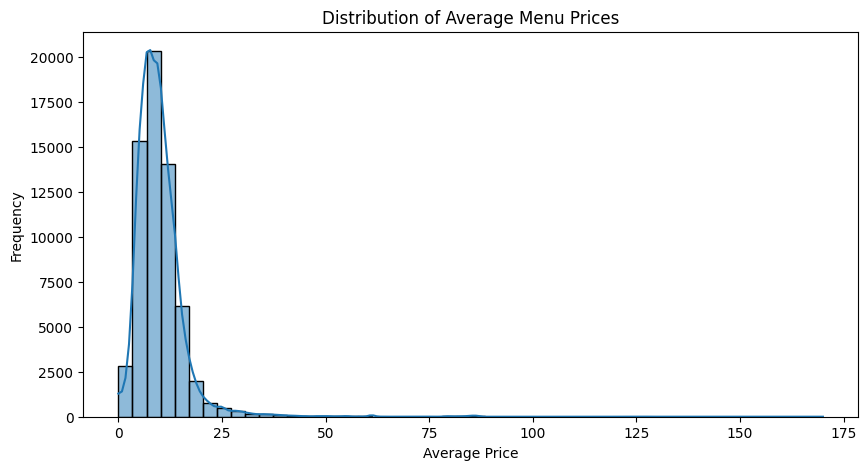

In [3]:
plt.figure(figsize=(10, 5))
sns.histplot(df_restaurants['avg_price'], bins=50, kde=True)
plt.title('Distribution of Average Menu Prices')
plt.xlabel('Average Price')
plt.ylabel('Frequency')
plt.show()

# Now we calculate the IQR and Detect outliers

In [4]:
# IQR
Q1 = df_restaurants['avg_price'].quantile(0.25)
Q3 = df_restaurants['avg_price'].quantile(0.75)
IQR = Q3 - Q1

# upper and lowerbounds
# The lower bound will calculate to negative value, so we set it to 0 to avoid negative prices.
lower_bound = max(0, Q1 - 1.5 * IQR) # using max to avoid negative lower bound 
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")


Lower Bound: 0
Upper Bound: 20.61022100689242


# Now to filter out the outliers and plot them

In [5]:
outliers = df_restaurants[
    (df_restaurants['avg_price'] < lower_bound) |
    (df_restaurants['avg_price'] > upper_bound)
]

print(f"Number of outliers: {len(outliers)}")
outliers[['name', 'avg_price', 'price_range']]




Number of outliers: 2195


,name,avg_price,price_range
5,Ocean Restaurant,28.750000,2
126,Michael's Steaks &amp; Seafood,21.292903,2
128,Ruth's Chris Steak House Brimingham (2300 Wood...,30.562500,1
257,Emily's Heirloom Pound Cakes,34.000000,3
418,K and Js Elegant Pastries,31.604167,2
...,...,...,...
62630,El Tiempo Cantina - 290,24.468571,1
62722,Okada Japanese Steakhouse,23.922727,2
62727,old - III Forks (17776 Dallas Parkway),35.227273,2
62775,Carlo's Bake Shop,20.740244,2


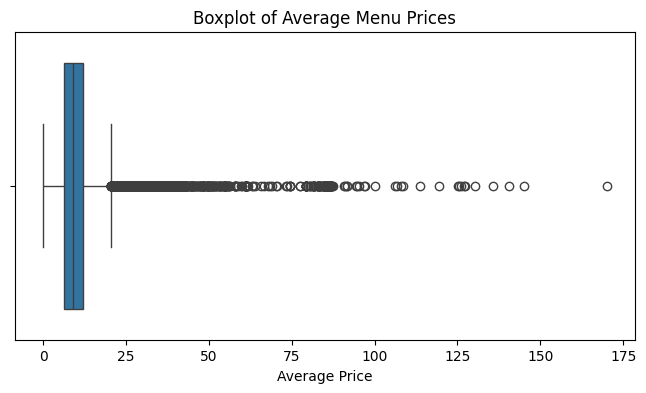

In [6]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_restaurants['avg_price'])
plt.title('Boxplot of Average Menu Prices')
plt.xlabel('Average Price')
plt.show()


# Create a version without outliers and show

In [7]:
df_no_outliers = df_restaurants[
    (df_restaurants['avg_price'] >= lower_bound) &
    (df_restaurants['avg_price'] <= upper_bound)
]

print(f"Original dataset size: {df_restaurants.shape[0]}")
print(f"Cleaned dataset size: {df_no_outliers.shape[0]}")
print(f"Number of removed outliers: {df_restaurants.shape[0] - df_no_outliers.shape[0]}")

df_no_outliers['avg_price'].describe() #5 number summary


Original dataset size: 62791
Cleaned dataset size: 60596
Number of removed outliers: 2195


count    60596.000000
mean         9.133880
std          3.878598
min          0.000000
25%          6.298852
50%          8.836303
75%         11.666455
max         20.606462
Name: avg_price, dtype: float64

### save new processed data in new csv file

In [8]:
df_no_outliers.to_csv('data/processed/processed_restaurants_no_outliers.csv', index=False)

# Now moving on to Log transformation on Version with outliers 
## For if we need to calculate anything with the outliers still included

In [9]:
df_restaurants['log_avg_price'] = np.log1p(df_restaurants['avg_price'])


# Save it in new csv file

In [10]:
df_restaurants.to_csv('data/processed/processed_restaurants_logged.csv', index=False)
